In [1]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data from the given files
train_X = pd.DataFrame(np.load('X_train.npy'))
train_Y = pd.DataFrame(np.load('Y_train.npy'))
test_X = pd.DataFrame(np.load('X_test.npy'))
test_Y = pd.DataFrame(np.load('Y_test.npy'))

# Impute missing values using the K Nearest Neighbor method
imputer = IterativeImputer(random_state=42)
train_X_imputed = imputer.fit_transform(train_X)
test_X_imputed = imputer.transform(test_X)  
"""IterativeImputer is a module used to provide multivariate imputation to estimate each feature from all the others, it does this to input missing
feature values as a function of other features ina  round-robin fashion."""

# Convert the imputed data into dataframes 
train_X_imputed = pd.DataFrame(train_X_imputed, columns=train_X.columns)
test_X_imputed = pd.DataFrame(test_X_imputed, columns=test_X.columns)


In [3]:
# Feature selection is performed to find the k best features, in this case 10
kBest = SelectKBest(r_regression, k=10)
train_X_selected = kBest.fit_transform(train_X_imputed, train_Y.values.ravel())
test_X_selected = kBest.transform(test_X_imputed) 
"""SelectKBest selects the k bets features according to the score passed into it as a parameter, in this case r_regression is used as the metric 
of interest so the 10 features with the best pmcc scores will be selected"""

'SelectKBest selects the k bets features according to the score passed into it as a parameter, in this case r_regression is used as the metric \nof interest so the 10 features with the best pmcc scores will be selected'

In [4]:
# Normalization in the range -1 to 1
minMaxScaler = MinMaxScaler(feature_range=(-1, 1))
train_X_normalized = minMaxScaler.fit_transform(train_X_selected)
test_X_normalized = minMaxScaler.transform(test_X_selected) 
"""MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,
down to a fixed range which cna be mroe easily managed."""

'MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,\ndown to a fixed range which cna be mroe easily managed.'

Training Accuracy: 0.5382716049382716
Testing Accuracy: 0.512962962962963


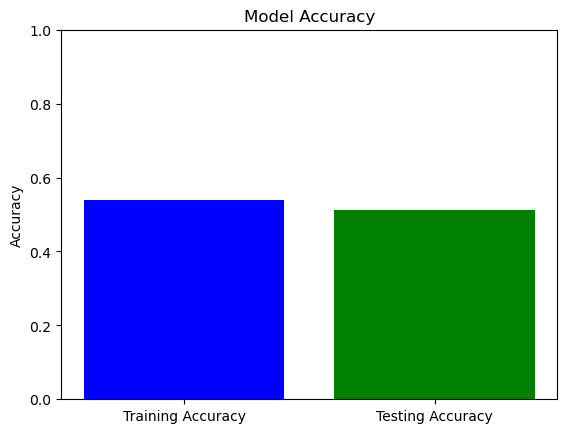

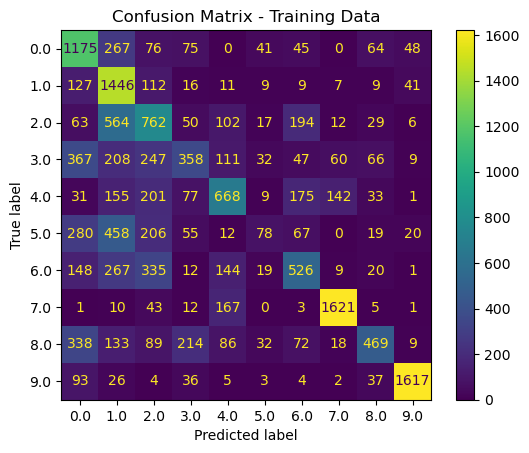

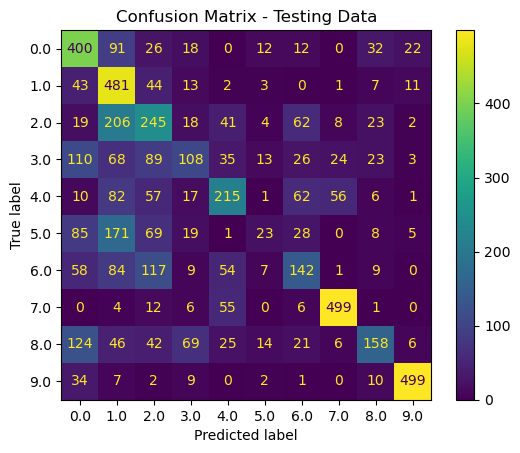

In [5]:
# Training the model
supportVectorClassifier = SVC()
supportVectorClassifier.fit(train_X_normalized, train_Y.values.ravel())  
"""SCV performs classification using support vector machines, this method is more suiteed for data sets that don't boast a huge number of features
and supports several combinations of hyperparameters."""

# Evaluate the model
training_accuracy = supportVectorClassifier.score(train_X_normalized, train_Y.values.ravel())
testing_accuracy = supportVectorClassifier.score(test_X_normalized, test_Y.values.ravel())

print('Training Accuracy:', training_accuracy)
print('Testing Accuracy:', testing_accuracy)

plt.figure()
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Find the predictive labels
y_train_pred = supportVectorClassifier.predict(train_X_normalized)
y_test_pred = supportVectorClassifier.predict(test_X_normalized)

# Plot confusion matrix for training data
train_cm = confusion_matrix(train_Y.values.ravel(), y_train_pred)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=supportVectorClassifier.classes_)
train_disp.plot()
plt.title('Confusion Matrix - Training Data')
plt.show()

# Plot confusion matrix for testing data
test_cm = confusion_matrix(test_Y.values.ravel(), y_test_pred)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=supportVectorClassifier.classes_)
test_disp.plot()
plt.title('Confusion Matrix - Testing Data')
plt.show()

An alternative method that could be used to select the appropriate number of features using pearson's correlation method, is to use recursive feature elimination (RFE). This method iteratively trains the model and removes the least important feature (identified by its coef_ value) with each pass through the loop. Eventually, the accuracy of the model will begin to decline once too many features are removed which will indeicate that the ideal number of features has already been selected. This is far less computationally expensive than testing the accuracy of every possible combination and is supported by sklearn packages specifically designed for feature selection.